In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import re

### Ederly people´s home

In [4]:
df_rs = pd.read_csv(r"data\TECH_friendly_RESIDENCIAS_MAYORES_2020-04-07.csv")
df_rs.head()

,Titularidad,Nombre,Dirección,CP,Municipio,Teléfono,Plazas,URL,Latitud,Longitud,Actualizado,Provincia
0,Privada,Residencia Ribera Alta,NA Caicedo - Sopeña 36,1420.0,Erriberagoitia/Ribera Alta,945 36 20 58 / 627 49 97 97 / 627 49 97 82,24.0,www.residenciariberaalta.com,42.785882,-2.916915,4-04-20 00:14:44,Álava
1,Pública provincial,Residencia pscogeriátrica Lakua,Calle Orio 2 - 4,1010.0,Vitoria-Gasteiz,945 17 82 27,50.0,NaN,42.865083,-2.693110,10-04-20 00:14:44,Álava
2,Privada,Residencia Burgelu,Avenida Burgelu 24,1192.0,Elburgo/Burgelu,658 74 08 19 / 945 40 06 86,31.0,www.actiweb.es/burgelu/,42.849456,-2.544482,4-04-20 00:14:44,Álava
3,Privada,Vivienda comunitaria Florida Etxea,Calle Manuel Iradier 33 - 1º,1005.0,Vitoria-Gasteiz,945 20 43 03,14.0,NaN,42.841876,-2.668397,14-02-20 00:14:44,Álava
4,Privada,La Saleta Albertia,NA Miñano Mayor 23,1510.0,Vitoria-Gasteiz,945 12 44 25,91.0,www.albertiaetxea.com,42.917257,-2.645510,30-04-20 00:14:44,Álava


In [114]:
#You have to get the geometry of the points of the residences to pass them to the map: i.e. convert Latitude and longitude to points
#Coordinate Reference System (CRS): https://geopandas.org/projections.html
#Referencia: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
crs = {'init': "epsg:4326"}
geometry_rs = [Point(xy) for xy in zip(df_rs['Longitud'], df_rs['Latitud'])]
geometry_rs[:3]

In [115]:
df_geo_rs = gpd.GeoDataFrame(df_rs,#We target the data
                             crs = crs, #Let's target the coordinate reference system
                             geometry = geometry_rs) #Let's specify the list of geometry points created earlier
df_geo_rs.head()

C:\Users\JoseLuisFernandez\miniconda3\envs\geop\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Titularidad,Nombre,Dirección,CP,Municipio,Teléfono,Plazas,URL,Latitud,Longitud,Actualizado,Provincia,geometry
0,Privada,Residencia Ribera Alta,NA Caicedo - Sopeña 36,1420.0,Erriberagoitia/Ribera Alta,945 36 20 58 / 627 49 97 97 / 627 49 97 82,24.0,www.residenciariberaalta.com,42.785882,-2.916915,4-04-20 00:14:44,Álava,POINT (-2.91691 42.78588)
1,Pública provincial,Residencia pscogeriátrica Lakua,Calle Orio 2 - 4,1010.0,Vitoria-Gasteiz,945 17 82 27,50.0,NaN,42.865083,-2.693110,10-04-20 00:14:44,Álava,POINT (-2.69311 42.86508)
2,Privada,Residencia Burgelu,Avenida Burgelu 24,1192.0,Elburgo/Burgelu,658 74 08 19 / 945 40 06 86,31.0,www.actiweb.es/burgelu/,42.849456,-2.544482,4-04-20 00:14:44,Álava,POINT (-2.54448 42.84946)
3,Privada,Vivienda comunitaria Florida Etxea,Calle Manuel Iradier 33 - 1º,1005.0,Vitoria-Gasteiz,945 20 43 03,14.0,NaN,42.841876,-2.668397,14-02-20 00:14:44,Álava,POINT (-2.66840 42.84188)
4,Privada,La Saleta Albertia,NA Miñano Mayor 23,1510.0,Vitoria-Gasteiz,945 12 44 25,91.0,www.albertiaetxea.com,42.917257,-2.645510,30-04-20 00:14:44,Álava,POINT (-2.64551 42.91726)


In [365]:
#We check what the CRS is to compare with other df when making the maps
df_geo_rs.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Some facts about residences

In [919]:
#Number of places per Municipality and District in the Community of Madrid
df_rs[(df_rs.CP.astype(str).str.contains('28*')) & (df_rs.Provincia == 'Madrid')].groupby(['Municipio','CP'])['Plazas'].sum().\
                                                    sort_values(ascending=False).head(20)
#df_rs.info()

Municipio              CP     
Madrid                 28023.0    1287.0
Rozas de Madrid (Las)  28232.0    1134.0
Ciempozuelos           28350.0    1101.0
Madrid                 28049.0    1084.0
Alcalá de Henares      28806.0    1025.0
Colmenar Viejo         28770.0     980.0
Madrid                 28007.0     918.0
                       28005.0     899.0
Leganés                28914.0     858.0
Madrid                 28033.0     838.0
                       28044.0     795.0
Navalcarnero           28600.0     795.0
Madrid                 28025.0     735.0
Aranjuez               28300.0     732.0
Rozas de Madrid (Las)  28290.0     716.0
Torrejón de Ardoz      28850.0     701.0
Móstoles               28935.0     693.0
Pozuelo de Alarcón     28224.0     672.0
Madrid                 28035.0     660.0
Torrelodones           28250.0     653.0
Name: Plazas, dtype: float64

In [974]:
#Number of places per Municipality and District in Barcelona
df_rs[(df_rs.CP.astype(str).str.contains('08*')) & (df_rs.Provincia == 'Barcelona')].groupby(['Municipio','CP'])['Plazas'].sum().\
                                                    sort_values(ascending=False).head(10)
#df_rs.info()

Municipio              CP    
Barcelona              8025.0    1426.0
                       8035.0    1403.0
                       8017.0     940.0
Castelldefels          8860.0     775.0
Barcelona              8032.0     771.0
                       8014.0     685.0
Cornellà de Llobregat  8940.0     676.0
Barcelona              8031.0     662.0
                       8016.0     589.0
                       8013.0     582.0
Name: Plazas, dtype: float64

In [976]:
#Number of places per Municipality in Barcelona
df_rs[(df_rs.CP.astype(str).str.contains('08*')) & (df_rs.Provincia == 'Barcelona')].groupby(['Municipio'])['Plazas'].sum().\
                                                    sort_values(ascending=False).head(10)
#df_rs.info()

Municipio
Barcelona                       16471.0
Sabadell                         1396.0
Terrassa                         1265.0
Sant Cugat del Vallès             954.0
Hospitalet de Llobregat (L')      944.0
Mataró                            776.0
Castelldefels                     775.0
Badalona                          716.0
Cornellà de Llobregat             676.0
Arenys de Mar                     554.0
Name: Plazas, dtype: float64

In [384]:
#Provinces with the highest number of places
df_rs.groupby('Provincia')['Plazas'].sum().sort_values(ascending=False).head(10)               

Provincia
Madrid        48768.0
Barcelona     45796.0
Valéncia      15515.0
Zaragoza      12420.0
Asturias      12313.0
Bizkaia       11584.0
Toledo         9987.0
Sevilla        8354.0
Alacant        8168.0
Valladolid     7578.0
Name: Plazas, dtype: float64

In [975]:
#Municipalities with the highest number of places
df_rs.groupby('Municipio')['Plazas'].sum().sort_values(ascending=False).head(10) 

Municipio
Madrid             17669.0
Barcelona          16471.0
Zaragoza            7118.0
Bilbao              3995.0
Gijón               3413.0
Valladolid          3406.0
Burgos              2853.0
Sevilla             2644.0
Málaga              2514.0
Vitoria-Gasteiz     2424.0
Name: Plazas, dtype: float64

## Geographic Data

### CCAA

In [7]:
#Download:http://centrodedescargas.cnig.es/CentroDescargas/index.jsp #(Municipal boundary lines)
#In zipfile is the path of the user in our computer
zipfile = "zip:///Users/JoseLuisFernandez/OneDrive/Máster/Proyectos GitHub/COVID19_elderly_homes/maps/lineas_limite.zip!recintos_autonomicas_inspire_peninbal_etrs89/recintos_autonomicas_inspire_peninbal_etrs89.shx"
map_ccaa = gpd.read_file(zipfile)
map_ccaa.head()

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
0,ES.IGN.SIGLIM34200000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34200000000,No asignado,0,0,None,"MULTIPOLYGON (((-4.29788 35.17045, -4.29786 35..."
1,ES.IGN.SIGLIM34200000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34200000000,No asignado,0,0,None,"POLYGON ((-5.41795 35.91194, -5.41826 35.91195..."
2,ES.IGN.SIGLIM34190000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34190000000,Ciudad Autónoma de Melilla,ES6,ES64,None,"POLYGON ((-2.95264 35.32030, -2.95258 35.32015..."
3,ES.IGN.SIGLIM34180000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34180000000,Ciudad Autónoma de Ceuta,ES6,ES63,None,"POLYGON ((-5.38206 35.91240, -5.38192 35.91248..."
4,ES.IGN.SIGLIM34170000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34170000000,La Rioja,ES2,ES23,None,"POLYGON ((-2.75758 42.03262, -2.75738 42.03310..."


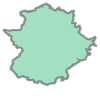

In [12]:
map_ccaa.iloc[10]['geometry']

In [8]:
map_ccaa['NAMEUNIT'][10]

'Extremadura'

### Municipios

In [94]:
#An API geojason can be extracted directly in 
# http://opendata.esri.es/datasets/53229f5912e04f1ba6dddb70a5abeb72_0?geometry=-20.390%2C37.412%2C14.481%2C43.268
#But this is a little slow, it's faster to have it on-premises
url = "https://opendata.arcgis.com/datasets/53229f5912e04f1ba6dddb70a5abeb72_0.geojson"
map_munic = gpd.read_file(url)
map_munic.head()

In [100]:
map_munic.head()

,OBJECTID,INSPIREID,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,CODIGOINE,Shape__Area,Shape__Length,geometry
0,1001,ES.IGN.SIGLIM34153131164,34153131164,Mélida,ES2,ES22,ES220,31164,4.782494e+07,44551.302203,"MULTIPOLYGON (((-1.46871 42.32584, -1.47168 42..."
1,1002,ES.IGN.SIGLIM34153131165,34153131165,Mendavia,ES2,ES22,ES220,31165,1.442167e+08,59482.880592,"POLYGON ((-2.28801 42.46736, -2.28686 42.46152..."
2,1003,ES.IGN.SIGLIM34153131166,34153131166,Mendaza,ES2,ES22,ES220,31166,6.094641e+07,51151.258547,"POLYGON ((-2.28840 42.65289, -2.28537 42.65109..."
3,1004,ES.IGN.SIGLIM34153131167,34153131167,Mendigorría,ES2,ES22,ES220,31167,7.284746e+07,42575.779510,"POLYGON ((-1.90300 42.61383, -1.90202 42.61243..."
4,1005,ES.IGN.SIGLIM34153131168,34153131168,Metauten,ES2,ES22,ES220,31168,4.181093e+07,30388.762420,"POLYGON ((-2.12757 42.65656, -2.12406 42.65790..."


### Poblaciones 

In [57]:
#We draw a more focused map by population
#zipfile2 is in path in our computer
zipfile2 = "zip:///Users/JoseLuisFernandez/Desktop/Documentos COVID19/mapas/Poblaciones_v0.zip!Poblaciones_v0.shx"
map_poblacion = gpd.read_file(zipfile2)
map_poblacion.head()

,id_ep,nombre,codine,ine,fecharef,habitantes,capital,geometry
0,5259,Los Piedros,14038001399,0,2016.0,40.0,0000,"POLYGON ((-4.60464 37.37017, -4.60464 37.37034..."
1,40828,Orozketa,48910040199,0,2016.0,78.0,0000,"POLYGON ((-2.66628 43.16806, -2.66744 43.16859..."
2,172540,Cortijo de los Anguitas,23026000199,0,2013.0,NaN,0000,"POLYGON ((-3.94225 37.57492, -3.94260 37.57500..."
3,22014,Ameixide,27044130199,0,2017.0,2.0,0000,"POLYGON ((-7.29859 43.25377, -7.29871 43.25390..."
4,17389,Vilarello do Río,27012180799,0,2014.0,0.0,0000,"POLYGON ((-6.98045 42.75656, -6.98084 42.75694..."


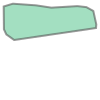

In [59]:
map_poblacion.iloc[10]['geometry']

In [60]:
map_poblacion['nombre'][10]

'Grab'

### Community of Madrid (Geo)

In [304]:
#We obtain data from the Community of Madrid, both COVID-19 and geometry
#Source: https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_muni_y_distritos
#url = "https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/ead67556-7e7d-45ee-9ae5-68765e1ebf7a/download/covid19_tia_muni_y_distritos.json"
#zipfile is in path in our computer
zipfile = "zip:///Users/JoseLuisFernandez/Desktop/Documentos COVID19/mapas/municipios_y_distritos_madrid.zip!municipios_y_distritos_madrid.shp"
map_munic_cam = gpd.read_file(zipfile)
map_munic_cam.head()

,DSMUNI,cod,Shape_Leng,Shape_Le_1,Shape_Area,codigo_geo,geometry
0,Madrid-Retiro,079603,9531.035074,9531.035074,5.407678e+06,079603,"POLYGON ((443663.017 4473349.384, 443663.267 4..."
1,Madrid-Salamanca,079604,10827.357991,10827.357991,5.372338e+06,079604,"POLYGON ((444067.804 4476571.218, 444057.220 4..."
2,Madrid-Centro,079601,10255.291929,10255.291929,5.216068e+06,079601,"POLYGON ((439586.516 4475753.323, 439594.830 4..."
3,Madrid-Arganzuela,079602,13005.066113,13005.066113,6.482887e+06,079602,"POLYGON ((440345.316 4472954.760, 440386.546 4..."
4,Madrid-Chamartín,079605,13513.441545,13513.441545,9.127204e+06,079605,"POLYGON ((441493.281 4478894.285, 441494.562 4..."


### Cataluña (Geo)

In [438]:
#I select from the general map of municipality extracted above. Select CODNUT2 == 'ES51'
catal = map_munic[map_munic.CODNUT2 == 'ES51']
catal.head(2)

,OBJECTID,INSPIREID,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,CODIGOINE,Shape__Area,Shape__Length,geometry
767,1768,ES.IGN.SIGLIM34090808001,34090808001,Abrera,ES5,ES51,ES511,08001,3.570585e+07,32419.282836,"POLYGON ((1.85517 41.51588, 1.85432 41.51601, ..."
768,1769,ES.IGN.SIGLIM34090808002,34090808002,Aguilar de Segarra,ES5,ES51,ES511,08002,7.771459e+07,53876.091885,"POLYGON ((1.58738 41.73157, 1.58742 41.73160, ..."


### We correlate Población_Provincia_CCAA with several df

In [68]:
#We see the correspondence between Population and Autonomous Community
zipfile3 = "zip:///Users/JoseLuisFernandez/Desktop/Documentos COVID19/mapas/BD_Municipios-Entidades.zip!PROVINCIAS.csv"
ccaa_provincia = gpd.read_file(zipfile3)
ccaa_provincia.head()

,COD_PROV,PROVINCIA,COD_CA,COMUNIDAD_AUTONOMA,CAPITAL,geometry
0,01,Araba/Álava,16,País Vasco/Euskadi,Vitoria-Gasteiz,None
1,02,Albacete,08,Castilla-La Mancha,Albacete,None
2,03,Alacant/Alicante,10,Comunitat Valenciana,Alicante/Alacant,None
3,04,Almería,01,Andalucía,Almería,None
4,05,Ávila,07,Castilla y León,Ávila,None


In [83]:
ccaa_provincia[ccaa_provincia['COMUNIDAD_AUTONOMA']== 'Canarias']

,COD_PROV,PROVINCIA,COD_CA,COMUNIDAD_AUTONOMA,CAPITAL,geometry
34,35,Las Palmas,05,Canarias,Las Palmas de Gran Canaria,None
37,38,Santa Cruz de Tenerife,05,Canarias,Santa Cruz de Tenerife,None


In [80]:
#We see the correspondence between Population and Autonomous Community
zipfile4 = "zip:///Users/JoseLuisFernandez/Desktop/Documentos COVID19/mapas/BD_Municipios-Entidades.zip!MUNICIPIOS.csv"
ccaa_municipios = gpd.read_file(zipfile4)
ccaa_municipios.head()

,COD_INE,ID_REL,COD_GEO,COD_PROV,PROVINCIA,NOMBRE_ACTUAL,POBLACION_MUNI,SUPERFICIE,PERIMETRO,COD_INE_CAPITAL,CAPITAL,POBLACION_CAPITAL,HOJA_MTN25_ETRS89,LONGITUD_ETRS89,LATITUD_ETRS89,ORIGENCOOR,ALTITUD,ORIGENALTITUD,geometry
0,01001000000,1010014,01010,01,Araba/Álava,Alegría-Dulantzi,2876,"1994,5872",35069,01001000101,Alegría-Dulantzi,2767,0113-3,"-2,51243731","42,83981158",Mapa,568,MDT5,None
1,01002000000,1010029,01020,01,Araba/Álava,Amurrio,10350,"9635,289",65134,01002000201,Amurrio,9263,0086-4,"-3,00007326","43,05427776",Mapa,219,MDT5,None
2,01003000000,1010035,01030,01,Araba/Álava,Aramaio,1467,"7327,4027",41818,01003000601,Ibarra,799,0087-4,"-2,56540037","43,05119653",Mapa,333,MDT5,None
3,01004000000,1010040,01040,01,Araba/Álava,Artziniega,1821,"2728,73",22886,01004000101,Artziniega,1695,0086-1,"-3,12791718","43,12084358",Mapa,210,MDT5,None
4,01006000000,1010066,01060,01,Araba/Álava,Armiñón,227,"1294,4326",24606,01006000101,Armiñón,106,0137-4,"-2,87183475","42,72326199",Mapa,467,MDT5,None


In [86]:
ccaa_municipios[ccaa_municipios['NOMBRE_ACTUAL'] == 'Orozketa']

,COD_INE,ID_REL,COD_GEO,COD_PROV,PROVINCIA,NOMBRE_ACTUAL,POBLACION_MUNI,SUPERFICIE,PERIMETRO,COD_INE_CAPITAL,CAPITAL,POBLACION_CAPITAL,HOJA_MTN25_ETRS89,LONGITUD_ETRS89,LATITUD_ETRS89,ORIGENCOOR,ALTITUD,ORIGENALTITUD,geometry


In [77]:
ccaa_poblacion = pd.read_excel('../mapas/Cod_Poblacion_CCAA.xls')
ccaa_poblacion.head()

,CPRO,CMUN,DC,NOMBRE
0,1,1,4,Alegría-Dulantzi
1,1,2,9,Amurrio
2,1,49,3,Añana
3,1,3,5,Aramaio
4,1,6,6,Armiñón


We know that the CPRORs of the Canary Islands are 35 and 38. We link `ccaa_poblacion` with `map_poblacion` to identify the populations that are from the Canary Islands and eliminate them, so we could focus the map later at the population level.

In [79]:
#We join the map_población the CCAA Column that corresponds to it
map_poblacion_sinCan = map_poblacion.merge(ccaa_poblacion, how='left', left_on = 'nombre', right_on = 'NOMBRE')
map_poblacion_sinCan

,id_ep,nombre,codine,ine,fecharef,habitantes,capital,geometry,CPRO,CMUN,DC,NOMBRE
0,5259,Los Piedros,14038001399,0,2016.0,40.0,0000,"POLYGON ((-4.60464 37.37017, -4.60464 37.37034...",NaN,NaN,NaN,NaN
1,40828,Orozketa,48910040199,0,2016.0,78.0,0000,"POLYGON ((-2.66628 43.16806, -2.66744 43.16859...",NaN,NaN,NaN,NaN
2,172540,Cortijo de los Anguitas,23026000199,0,2013.0,NaN,0000,"POLYGON ((-3.94225 37.57492, -3.94260 37.57500...",NaN,NaN,NaN,NaN
3,22014,Ameixide,27044130199,0,2017.0,2.0,0000,"POLYGON ((-7.29859 43.25377, -7.29871 43.25390...",NaN,NaN,NaN,NaN
4,17389,Vilarello do Río,27012180799,0,2014.0,0.0,0000,"POLYGON ((-6.98045 42.75656, -6.98084 42.75694...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
143274,41936,O Castro,15007090201,1,2018.0,36.0,0000,"POLYGON ((-8.69932 42.96082, -8.69932 42.96074...",NaN,NaN,NaN,NaN
143275,44162,O Cruceiro,15062020901,1,2018.0,54.0,0000,"POLYGON ((-8.90191 42.86369, -8.90190 42.86360...",NaN,NaN,NaN,NaN
143276,45761,Ferreirós de Valboa,27006080201,1,2018.0,57.0,0000,"POLYGON ((-7.17622 42.80948, -7.17621 42.80939...",NaN,NaN,NaN,NaN
143277,42707,A Pasada,15022041501,1,2018.0,22.0,0000,"POLYGON ((-8.00306 43.64749, -8.00305 43.64740...",NaN,NaN,NaN,NaN


### Data COVID-19

In [13]:
#Covid-19 cases by age and date
df_covid_age = pd.read_csv('data/nacional_covid19_rango_edad.csv')
df_covid_age.head()

,fecha,rango_edad,sexo,casos_confirmados,hospitalizados,ingresos_uci,fallecidos
0,2020-03-23,0-9,ambos,129,34,1,0
1,2020-03-23,10-19,ambos,221,15,0,1
2,2020-03-23,20-29,ambos,1285,183,8,4
3,2020-03-23,30-39,ambos,2208,365,15,3
4,2020-03-23,40-49,ambos,2919,663,40,9


In [14]:
df_covid_age.groupby('rango_edad')['casos_confirmados'].sum()

rango_edad
0-9         11388
10-19       20386
20-29      172887
30-39      325100
40-49      497180
50-59      604228
60-69      546335
70-79      528571
80 y +       6034
80-89      422572
90 y +     143251
Total     3277175
Name: casos_confirmados, dtype: int64

In [846]:
url = 'https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_datos_isciii.csv'
df_covid_ccaa = pd.read_csv(url, sep=',', header=0)
df_covid_ccaa.head()

,Fecha,cod_ine,CCAA,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
0,2020-02-20,1,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-20,2,Aragón,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-20,3,Asturias,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-20,4,Baleares,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-20,5,Canarias,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [847]:
df_covid_ccaa.tail()

,Fecha,cod_ine,CCAA,Casos,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
1230,2020-04-24,19,Melilla,NaN,108.0,10.0,44.0,3.0,2.0,77.0
1231,2020-04-24,14,Murcia,NaN,1468.0,288.0,625.0,105.0,126.0,842.0
1232,2020-04-24,15,Navarra,NaN,4627.0,647.0,1937.0,129.0,429.0,1737.0
1233,2020-04-24,16,País Vasco,NaN,12366.0,1766.0,6375.0,525.0,1212.0,8941.0
1234,2020-04-24,17,La Rioja,NaN,3821.0,1125.0,1360.0,83.0,311.0,1999.0


In [848]:
df_covid_ccaa = df_covid_ccaa[df_covid_ccaa.Fecha == '2020-04-24']

In [851]:
df_covid_ccaa.Casos = df_covid_ccaa['PCR+'] + df_covid_ccaa['TestAc+']

In [852]:
#We generate a df with this grouping
covid_ccaa =  df_covid_ccaa.groupby('CCAA')['Casos'].sum().sort_values(ascending=False).reset_index()
covid_ccaa.head()

,CCAA,Casos
0,Madrid,62510.0
1,Cataluña,47288.0
2,Castilla La Mancha,18525.0
3,Castilla y León,18259.0
4,País Vasco,14132.0


In [853]:
covid_ccaa.Casos.sum() #Total cases

223759.0

In [792]:
max(covid_ccaa.Casos)

61726.0

In [854]:
covid_ccaa.Casos.values

array([62510., 47288., 18525., 18259., 14132., 12824., 11123.,  9116.,
        5382.,  5274.,  4946.,  3458.,  2546.,  2315.,  2155.,  1907.,
        1756.,   125.,   118.])

In [855]:
covid_ccaa.Casos.min()

118.0

In [856]:
#We converted to a list the name of the ccaa
covid_ccaa.CCAA.to_list()

['Madrid',
 'Cataluña',
 'Castilla La Mancha',
 'Castilla y León',
 'País Vasco',
 'Andalucía',
 'C. Valenciana',
 'Galicia',
 'Aragón',
 'Navarra',
 'La Rioja',
 'Extremadura',
 'Asturias',
 'Cantabria',
 'Canarias',
 'Baleares',
 'Murcia',
 'Ceuta',
 'Melilla']

In [27]:
#We need to homogenize the names of the ccaa for df join operations
dict_ccaa = {'Andalucía':'Andalucía','Aragón':'Aragón','Principado de Asturias':'Asturias', 'Illes Balears':'Baleares', 
 'Comunitat Valenciana':'C. Valenciana','Canarias':'Canarias','Cantabria':'Cantabria', 'Castilla-La Mancha':'Castilla La Mancha',
'Castilla y León':'Castilla y León', 'Cataluña/Catalunya':'Cataluña','Ciudad Autónoma de Ceuta':'Ceuta', 'Extremadura':'Extremadura',
'Galicia':'Galicia', 'La Rioja':'La Rioja', 'Comunidad de Madrid':'Madrid', 'Ciudad Autónoma de Melilla':'Melilla',
'Región de Murcia':'Murcia', 'Comunidad Foral de Navarra':'Navarra', 'País Vasco/Euskadi':'País Vasco'}

In [33]:
#Changed the nomenglature of the ccaa in the df of geolocation map_ccaa
map_ccaa['NAMEUNIT'].replace(dict_ccaa, inplace=True)

In [34]:
map_ccaa['NAMEUNIT'].unique()

array(['No asignado', 'Melilla', 'Ceuta', 'La Rioja', 'País Vasco',
       'Navarra', 'Murcia', 'Madrid', 'Galicia', 'Extremadura',
       'C. Valenciana', 'Cataluña', 'Castilla La Mancha',
       'Castilla y León', 'Cantabria', 'Baleares', 'Asturias', 'Aragón',
       'Andalucía'], dtype=object)

In [38]:
map_ccaa.shape

(20, 10)

#### Data COVID-19 Community of Madrid

In [618]:
#It gives us errors of the format, so we do this to find out in which encoding format this
with open(r'data/covid19_tia_muni_y_distritos_CMADRID.csv') as f:
    print(f)

<_io.TextIOWrapper name='covid19_tia_muni_y_distritos_CMADRID.csv' mode='r' encoding='cp1252'>


In [861]:
url = 'https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412/download/covid19_tia_muni_y_distritos.csv'
covid_cam = pd.read_csv(url, sep=';', encoding='cp1252')#To read it,decoded with the above data
covid_cam.head()

,municipio_distrito,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
0,Madrid-Retiro,2020/04/25 07:00:00,147.0,"132,23",1284.0,"1154,95",79603
1,Madrid-Salamanca,2020/04/25 07:00:00,219.0,"139,19",1456.0,"925,38",79604
2,Madrid-Centro,2020/04/25 07:00:00,231.0,"162,41",1060.0,"745,28",79601
3,Madrid-Arganzuela,2020/04/25 07:00:00,250.0,"140,13",1451.0,"813,33",79602
4,Madrid-Chamartín,2020/04/25 07:00:00,231.0,"157,27",1444.0,"983,08",79605


In [863]:
#We do tests to extract the name without symbols
txt=covid_cam.municipio_distrito[0]

out = re.sub(r"[\[\]\'\ ]+",'', txt)
print(out)

Madrid-Retiro


TIA: Cumulative incidence rate from the beginning of the epidemic: cumulative number of positive cases confirmed by PCR, from the beginning of the epidemic to the day before the report date, among the population of each territorial area to February 1, 2020 (population database of Health Card).  
It is expressed in the meantime for one hundred thousand people = Cases per 100,000 people
Reference: https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_muni_y_distritos/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412

In [864]:
df_covid_cam = covid_cam[covid_cam.fecha_informe == '2020/04/25 07:00:00']

In [865]:
len(df_covid_cam)

199

In [867]:
df_covid_cam.casos_confirmados_totales.sum()

57611.0

#### COVID-19 facts Catalonia

Data: https://analisi.transparenciacatalunya.cat/es/browse?q=Registre%20%20COVID-19%20municipi&sortBy=relevance

In [937]:
df_covid_catal = pd.read_csv('data/Registre_de_casos_de_COVID-19_realitzats_a_Catalunya._Segregaci__per_sexe_i_municipi.csv')
df_covid_catal.head()

,TipusCasData,ComarcaCodi,ComarcaDescripcio,MunicipiCodi,MunicipiDescripcio,SexeCodi,SexeDescripcio,TipusCasDescripcio,NumCasos
0,25/04/2020,24.0,Osona,8298.0,Vic,0,Home,Positiu,1
1,25/04/2020,13.0,Barcelonès,8101.0,L'Hospitalet de Llobregat,0,Home,Positiu,1
2,25/04/2020,10.0,Baix Empordà,17118.0,Palamós,1,Dona,Positiu,1
3,25/04/2020,21.0,Maresme,8118.0,El Masnou,1,Dona,Positiu,1
4,25/04/2020,27.0,Pla d'Urgell,25248.0,Vilanova de Bellpuig,1,Dona,Positiu,1


In [938]:
df_covid_catal.TipusCasDescripcio.unique()

array(['Positiu', 'Sospitós'], dtype=object)

In [940]:
df_covid_catal_json.resultatcoviddescripcio.unique()

array(['Positiu', 'Sospitós'], dtype=object)

In [942]:
#We got a df with the municipalities with the most cases
#With the API and json they come out much less than with the csv maybe it's the last 14 days but you don't put it in the description
covid_cat = df_covid_catal.groupby(['MunicipiDescripcio', 'MunicipiCodi'])['NumCasos'].sum().sort_values(ascending=False).reset_index()
covid_cat.head()
#Reference to contrast the results = https://mcocam.shinyapps.io/COVID19/

,MunicipiDescripcio,MunicipiCodi,NumCasos
0,Barcelona,8019.0,35243
1,L'Hospitalet de Llobregat,8101.0,5142
2,Badalona,8015.0,4771
3,Sabadell,8187.0,4689
4,Terrassa,8279.0,4661


In [945]:
#We select the positives to be able to compare it with Madrid
#We filter out positive cases
df_covid_catal_post = df_covid_catal[df_covid_catal['TipusCasDescripcio'] == 'Positiu']

In [950]:
#We got a df with the municipalities with the most cases
covid_cat_post = df_covid_catal_post.groupby(['MunicipiDescripcio', 'MunicipiCodi'])['NumCasos'].sum().sort_values(ascending=False).reset_index()
covid_cat_post.head(10)
#Reference to contrast the results = https://mcocam.shinyapps.io/COVID19/

,MunicipiDescripcio,MunicipiCodi,NumCasos
0,Barcelona,8019.0,12083
1,L'Hospitalet de Llobregat,8101.0,2104
2,Sabadell,8187.0,1815
3,Badalona,8015.0,1619
4,Terrassa,8279.0,1440
5,Santa Coloma de Gramenet,8245.0,1005
6,Girona,17079.0,858
7,Sant Boi de Llobregat,8200.0,740
8,Lleida,25120.0,733
9,Sant Cugat del Vallès,8205.0,617


In [949]:
sum(covid_cat_post.NumCasos)

46556

## Union of the different dfs

In [859]:
#We join the two data frames the map_ccaa of ccaa and the cases covid by ccaa
#Merge shapefile with residencial data
df_covid_ccaa = map_ccaa.merge(covid_ccaa, how='left', left_on = 'NAMEUNIT', right_on = 'CCAA')
#df_covid_ccaa['Casos'] = df_covid_ccaa['Casos'].astype(int)
df_covid_ccaa.head()

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry,CCAA,Casos
0,ES.IGN.SIGLIM34200000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34200000000,No asignado,0,0,None,"MULTIPOLYGON (((-4.29788 35.17045, -4.29786 35...",NaN,NaN
1,ES.IGN.SIGLIM34200000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34200000000,No asignado,0,0,None,"POLYGON ((-5.41795 35.91194, -5.41826 35.91195...",NaN,NaN
2,ES.IGN.SIGLIM34190000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34190000000,Melilla,ES6,ES64,None,"POLYGON ((-2.95264 35.32030, -2.95258 35.32015...",Melilla,118.0
3,ES.IGN.SIGLIM34180000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34180000000,Ceuta,ES6,ES63,None,"POLYGON ((-5.38206 35.91240, -5.38192 35.91248...",Ceuta,125.0
4,ES.IGN.SIGLIM34170000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34170000000,La Rioja,ES2,ES23,None,"POLYGON ((-2.75758 42.03262, -2.75738 42.03310...",La Rioja,4946.0


#### We join data Community of Madrid

In [868]:
#We look at the geometry data of the CAM
print(len(map_munic_cam))
map_munic_cam[:1]

199


,DSMUNI,cod,Shape_Leng,Shape_Le_1,Shape_Area,codigo_geo,geometry
0,Madrid-Retiro,079603,9531.035074,9531.035074,5.407678e+06,79603,"POLYGON ((443663.017 4473349.384, 443663.267 4..."


In [627]:
#We look at COVID incidence data on CAM
print(len(df_covid_cam))
covid_cam[:1]


199


,municipio_distrito,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
0,Madrid-Retiro,2020/04/23 07:00:00,143.0,"128,63",1253.0,"1127,06",79603


In [628]:
df_covid_cam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   municipio_distrito                        199 non-null    object 
 1   fecha_informe                             199 non-null    object 
 2   casos_confirmados_ultimos_14dias          96 non-null     float64
 3   tasa_incidencia_acumulada_ultimos_14dias  199 non-null    object 
 4   casos_confirmados_totales                 150 non-null    float64
 5   tasa_incidencia_acumulada_total           199 non-null    object 
 6   codigo_geometria                          199 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 12.4+ KB


In [305]:
#Let's make sure that the formats are text for the merge
map_munic_cam['codigo_geo'] = map_munic_cam['codigo_geo'].astype(int)
map_munic_cam.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DSMUNI      199 non-null    object  
 1   cod         199 non-null    object  
 2   Shape_Leng  199 non-null    float64 
 3   Shape_Le_1  199 non-null    float64 
 4   Shape_Area  199 non-null    float64 
 5   codigo_geo  199 non-null    int32   
 6   geometry    199 non-null    geometry
dtypes: float64(3), geometry(1), int32(1), object(2)
memory usage: 10.2+ KB


In [869]:
df_covid_cam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   municipio_distrito                        199 non-null    object 
 1   fecha_informe                             199 non-null    object 
 2   casos_confirmados_ultimos_14dias          92 non-null     float64
 3   tasa_incidencia_acumulada_ultimos_14dias  199 non-null    object 
 4   casos_confirmados_totales                 152 non-null    float64
 5   tasa_incidencia_acumulada_total           199 non-null    object 
 6   codigo_geometria                          199 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 12.4+ KB


In [870]:
#It is also interesting to add the Cases and the ****cumulative incidence rate (TIA)**** every 100,000 inhabitants
#to have a more normalized measure
#before we replace the commas with periods and change the types of values that are now in "object"
df_covid_cam.tasa_incidencia_acumulada_total = df_covid_cam.tasa_incidencia_acumulada_total.apply(lambda x: x.replace(',','.'))
df_covid_cam.tasa_incidencia_acumulada_total = pd.to_numeric(df_covid_cam.tasa_incidencia_acumulada_total)
#df_covid_cam.tasa_incidencia_acumulada_total = pd.to_numeric(df_covid_cam.tasa_incidencia_acumulada_total)

C:\Users\JoseLuisFernandez\miniconda3\envs\geop\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [871]:
df_covid_cam.tasa_incidencia_acumulada_ultimos_14dias = df_covid_cam.tasa_incidencia_acumulada_ultimos_14dias.apply(lambda x: x.replace(',','.'))
df_covid_cam.tasa_incidencia_acumulada_ultimos_14dias = pd.to_numeric(df_covid_cam.tasa_incidencia_acumulada_ultimos_14dias)

In [875]:
df_covid_cam.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Municipios_CAM                            199 non-null    object  
 1   cod                                       199 non-null    object  
 2   Shape_Leng                                199 non-null    float64 
 3   Shape_Le_1                                199 non-null    float64 
 4   Shape_Area                                199 non-null    float64 
 5   codigo_geo                                199 non-null    int32   
 6   geometry                                  199 non-null    geometry
 7   fecha_informe                             199 non-null    object  
 8   casos_confirmados_ultimos_14dias          92 non-null     float64 
 9   tasa_incidencia_acumulada_ultimos_14dias  199 non-null    float64 
 10  Casos             

In [418]:
#covid_cam.groupby(['municipio_distrito','codigo_geometria'])['tasa_incidencia_acumulada_total'].mean() \
#                                                                .sort_values(ascending=False).head(20)
#tia_cam = covid_cam.groupby(['municipio_distrito','codigo_geometria'])['tasa_incidencia_acumulada_total'].mean().reset_index()

In [873]:
#We join geometry and COVID data in the ****Community of Madrid*****
df_covid_cam = map_munic_cam.merge(df_covid_cam, how='left', left_on = 'codigo_geo', right_on = 'codigo_geometria')
df_covid_cam = df_covid_cam.drop('municipio_distrito', 1)
df_covid_cam = df_covid_cam.rename({'DSMUNI':'Municipios_CAM','tasa_incidencia_acumulada_total':'Tia','casos_confirmados_totales': 'Casos'}, axis=1)
df_covid_cam.head()

,Municipios_CAM,cod,Shape_Leng,Shape_Le_1,Shape_Area,codigo_geo,geometry,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,Casos,Tia,codigo_geometria
0,Madrid-Retiro,079603,9531.035074,9531.035074,5.407678e+06,79603,"POLYGON ((443663.017 4473349.384, 443663.267 4...",2020/04/25 07:00:00,147.0,132.23,1284.0,1154.95,79603
1,Madrid-Salamanca,079604,10827.357991,10827.357991,5.372338e+06,79604,"POLYGON ((444067.804 4476571.218, 444057.220 4...",2020/04/25 07:00:00,219.0,139.19,1456.0,925.38,79604
2,Madrid-Centro,079601,10255.291929,10255.291929,5.216068e+06,79601,"POLYGON ((439586.516 4475753.323, 439594.830 4...",2020/04/25 07:00:00,231.0,162.41,1060.0,745.28,79601
3,Madrid-Arganzuela,079602,13005.066113,13005.066113,6.482887e+06,79602,"POLYGON ((440345.316 4472954.760, 440386.546 4...",2020/04/25 07:00:00,250.0,140.13,1451.0,813.33,79602
4,Madrid-Chamartín,079605,13513.441545,13513.441545,9.127204e+06,79605,"POLYGON ((441493.281 4478894.285, 441494.562 4...",2020/04/25 07:00:00,231.0,157.27,1444.0,983.08,79605


In [874]:
df_covid_cam[df_covid_cam.Municipios_CAM.str.contains('Leganés')]

,Municipios_CAM,cod,Shape_Leng,Shape_Le_1,Shape_Area,codigo_geo,geometry,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,Casos,Tia,codigo_geometria
80,Leganés,0745,28260.171861,28260.171861,4.322303e+07,745,"POLYGON ((438712.790 4467846.297, 438694.185 4...",2020/04/25 07:00:00,278.0,141.18,2757.0,1400.15,745


In [876]:
#We get the CRS to compare it with the df of residences and see if they can be mapped together
df_covid_cam.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°W to 0°W and ETRS89 by country
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [877]:
#We check what the CRS is to compare with other df when making the maps
df_geo_rs.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

They are checked that they have different CRS (Coordinate Reference Systems) so you have to match them to be able to represent both at once on a geographic map.  
Therefore when making joint maps, you will have to change the crs of one of them to match the other.  
Reference: https://geopandas.org/projections.html

#### Unimos datos Cataluña

In [445]:
#We converted the format of some data to match it in the merge
catal.CODIGOINE = catal.CODIGOINE.astype(int)
catal.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 948 entries, 767 to 3927
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       948 non-null    int64   
 1   INSPIREID      948 non-null    object  
 2   NATCODE        948 non-null    object  
 3   NAMEUNIT       948 non-null    object  
 4   CODNUT1        948 non-null    object  
 5   CODNUT2        948 non-null    object  
 6   CODNUT3        948 non-null    object  
 7   CODIGOINE      948 non-null    int32   
 8   Shape__Area    948 non-null    float64 
 9   Shape__Length  948 non-null    float64 
 10  geometry       948 non-null    geometry
dtypes: float64(2), geometry(1), int32(1), int64(1), object(6)
memory usage: 85.2+ KB


C:\Users\JoseLuisFernandez\miniconda3\envs\geop\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [952]:
covid_cat_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MunicipiDescripcio  668 non-null    object 
 1   MunicipiCodi        668 non-null    float64
 2   NumCasos            668 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 15.8+ KB


In [953]:
covid_cat_post.MunicipiCodi = covid_cat.MunicipiCodi.astype(int)
covid_cat_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MunicipiDescripcio  668 non-null    object
 1   MunicipiCodi        668 non-null    int32 
 2   NumCasos            668 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 13.2+ KB


In [954]:
#We join geometry and COVID data in the ****Community of Madrid*****
df_covid_catal = catal.merge(covid_cat_post, how='left', left_on = 'CODIGOINE', right_on = 'MunicipiCodi')
df_covid_catal = df_covid_catal.drop('MunicipiDescripcio', 1)
df_covid_catal = df_covid_catal.rename({'NAMEUNIT':'Municipios_CAT','NumCasos': 'Casos'}, axis=1)
df_covid_catal.head()

,OBJECTID,INSPIREID,NATCODE,Municipios_CAT,CODNUT1,CODNUT2,CODNUT3,CODIGOINE,Shape__Area,Shape__Length,geometry,MunicipiCodi,Casos
0,1768,ES.IGN.SIGLIM34090808001,34090808001,Abrera,ES5,ES51,ES511,8001,3.570585e+07,32419.282836,"POLYGON ((1.85517 41.51588, 1.85432 41.51601, ...",8001.0,49.0
1,1769,ES.IGN.SIGLIM34090808002,34090808002,Aguilar de Segarra,ES5,ES51,ES511,8002,7.771459e+07,53876.091885,"POLYGON ((1.58738 41.73157, 1.58742 41.73160, ...",8002.0,1.0
2,1770,ES.IGN.SIGLIM34090808003,34090808003,Alella,ES5,ES51,ES511,8003,1.726336e+07,19050.969739,"POLYGON ((2.26661 41.50466, 2.26802 41.50414, ...",8003.0,87.0
3,1771,ES.IGN.SIGLIM34090808004,34090808004,Alpens,ES5,ES51,ES511,8004,2.484492e+07,30588.164521,"POLYGON ((2.06115 42.13516, 2.06137 42.13509, ...",NaN,NaN
4,1772,ES.IGN.SIGLIM34090808005,34090808005,L'Ametlla del Vallès,ES5,ES51,ES511,8005,2.533868e+07,29068.225838,"POLYGON ((2.23122 41.66527, 2.23355 41.66475, ...",8005.0,79.0


In [955]:
df_covid_catal.Casos.sum()

46556.0

Leg calculate the Aunt, we have to join the population of the Municipal Padrón 2019 of the INE

In [956]:
padron = pd.read_excel('data/Poblacion Municipal_2019.xlsx', header=1)

In [957]:
padron.PROVINCIA.unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ceuta', 'Ciudad Real', 'Córdoba',
       'Coruña, A', 'Cuenca', 'Gipuzkoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida',
       'Lugo', 'Madrid', 'Málaga', 'Melilla', 'Murcia', 'Navarra',
       'Ourense', 'Palencia', 'Palmas, Las', 'Pontevedra', 'Rioja, La',
       'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
       'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia/València',
       'Valladolid', 'Zamora', 'Zaragoza'], dtype=object)

In [958]:
padron_cat = padron[padron.PROVINCIA.isin(['Barcelona', 'Lleida', 'Girona', 'Tarragona'])]
padron_cat.head()
print(len(padron_cat))

947


In [959]:
padron_cat.head()

,CPRO,PROVINCIA,CMUN,NOMBRE,POB19,HOMBRES,MUJERES
940,8,Barcelona,1,Abrera,12489,6326,6163
941,8,Barcelona,2,Aguilar de Segarra,288,155,133
942,8,Barcelona,14,Aiguafreda,2504,1208,1296
943,8,Barcelona,3,Alella,9801,4762,5039
944,8,Barcelona,4,Alpens,266,144,122


In [960]:
print(df_covid_catal.Municipios_CAT[0])

Abrera


In [961]:
#Join with df_covid_catal
df_covid_catal = df_covid_catal.merge(padron_cat[['NOMBRE','POB19']], how='left', left_on = 'Municipios_CAT', right_on = 'NOMBRE')
df_covid_catal = df_covid_catal.drop('NOMBRE', 1)
df_covid_catal.head()

,OBJECTID,INSPIREID,NATCODE,Municipios_CAT,CODNUT1,CODNUT2,CODNUT3,CODIGOINE,Shape__Area,Shape__Length,geometry,MunicipiCodi,Casos,POB19
0,1768,ES.IGN.SIGLIM34090808001,34090808001,Abrera,ES5,ES51,ES511,8001,3.570585e+07,32419.282836,"POLYGON ((1.85517 41.51588, 1.85432 41.51601, ...",8001.0,49.0,12489.0
1,1769,ES.IGN.SIGLIM34090808002,34090808002,Aguilar de Segarra,ES5,ES51,ES511,8002,7.771459e+07,53876.091885,"POLYGON ((1.58738 41.73157, 1.58742 41.73160, ...",8002.0,1.0,288.0
2,1770,ES.IGN.SIGLIM34090808003,34090808003,Alella,ES5,ES51,ES511,8003,1.726336e+07,19050.969739,"POLYGON ((2.26661 41.50466, 2.26802 41.50414, ...",8003.0,87.0,9801.0
3,1771,ES.IGN.SIGLIM34090808004,34090808004,Alpens,ES5,ES51,ES511,8004,2.484492e+07,30588.164521,"POLYGON ((2.06115 42.13516, 2.06137 42.13509, ...",NaN,NaN,266.0
4,1772,ES.IGN.SIGLIM34090808005,34090808005,L'Ametlla del Vallès,ES5,ES51,ES511,8005,2.533868e+07,29068.225838,"POLYGON ((2.23122 41.66527, 2.23355 41.66475, ...",8005.0,79.0,NaN


In [962]:
#We calculated the TIA
df_covid_catal['Tia'] = df_covid_catal['Casos']/df_covid_catal['POB19']*100000
df_covid_catal.head()

,OBJECTID,INSPIREID,NATCODE,Municipios_CAT,CODNUT1,CODNUT2,CODNUT3,CODIGOINE,Shape__Area,Shape__Length,geometry,MunicipiCodi,Casos,POB19,Tia
0,1768,ES.IGN.SIGLIM34090808001,34090808001,Abrera,ES5,ES51,ES511,8001,3.570585e+07,32419.282836,"POLYGON ((1.85517 41.51588, 1.85432 41.51601, ...",8001.0,49.0,12489.0,392.345264
1,1769,ES.IGN.SIGLIM34090808002,34090808002,Aguilar de Segarra,ES5,ES51,ES511,8002,7.771459e+07,53876.091885,"POLYGON ((1.58738 41.73157, 1.58742 41.73160, ...",8002.0,1.0,288.0,347.222222
2,1770,ES.IGN.SIGLIM34090808003,34090808003,Alella,ES5,ES51,ES511,8003,1.726336e+07,19050.969739,"POLYGON ((2.26661 41.50466, 2.26802 41.50414, ...",8003.0,87.0,9801.0,887.664524
3,1771,ES.IGN.SIGLIM34090808004,34090808004,Alpens,ES5,ES51,ES511,8004,2.484492e+07,30588.164521,"POLYGON ((2.06115 42.13516, 2.06137 42.13509, ...",NaN,NaN,266.0,NaN
4,1772,ES.IGN.SIGLIM34090808005,34090808005,L'Ametlla del Vallès,ES5,ES51,ES511,8005,2.533868e+07,29068.225838,"POLYGON ((2.23122 41.66527, 2.23355 41.66475, ...",8005.0,79.0,NaN,NaN


## We create the Maps
### 1. Matplotlib (Static)

In [42]:
#Importamos las librerías
from matplotlib import pyplot as plt
#%matplotlib notebook #Genera algo de interactividad en el gráfico de matplotlib
%matplotlibe inline
%config InlineBackend.figure_format='retina'

UsageError: Line magic function `%matplotlibe` not found.


#### Autonomous Communities

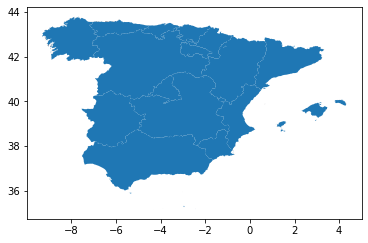

In [759]:
#We proved that we visualized the map of Spain and the ccaa
df_covid_ccaa.plot();

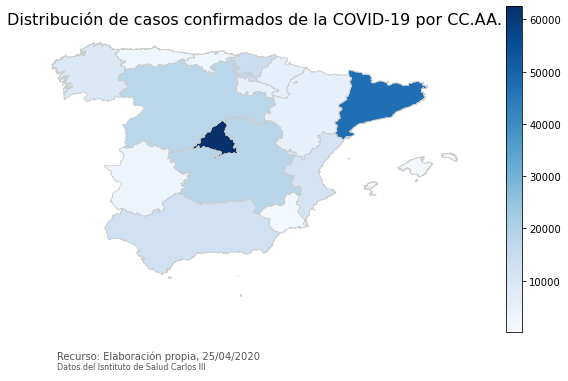

In [992]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Casos'
# set the range for the choropleth
vmin, vmax = covid_ccaa.Casos.max(), covid_ccaa.Casos.min()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# eliminar el eje 
ax.axis ('off')
# add a title
ax.set_title('Distribución de casos confirmados de la COVID-19 por CC.AA.', fontdict={'fontsize': '16', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Recurso: Elaboración propia, 25/04/2020',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')
ax.annotate('Datos del Isntituto de Salud Carlos III',xy=(0.1, .05),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=8, color='#555555')
            
# create map
df_covid_ccaa.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.savefig('Figuras/Distribucion_casos_ccaa.jpg')

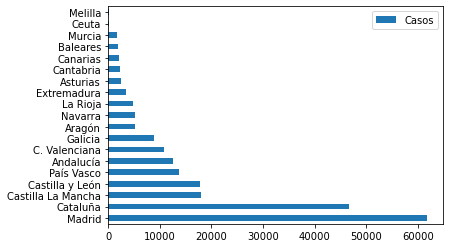

In [817]:
names = covid_ccaa['CCAA'].to_list()
fig, ax = plt.subplots()
covid_ccaa.plot(ax = ax, kind='barh');
ax.set_yticklabels(names)
plt.savefig('Figuras/Distribucion_casos_ccaa_barh.jpg')
plt.show()

#### Residences in Spain

In [134]:
#We make a list of public or private residences
privadas = ('Privada','Privada sin fin de lucro', np.nan)
publicas = ('Pública provincial', 'Pública local', 'Pública autonómica', 'Pública estatal')

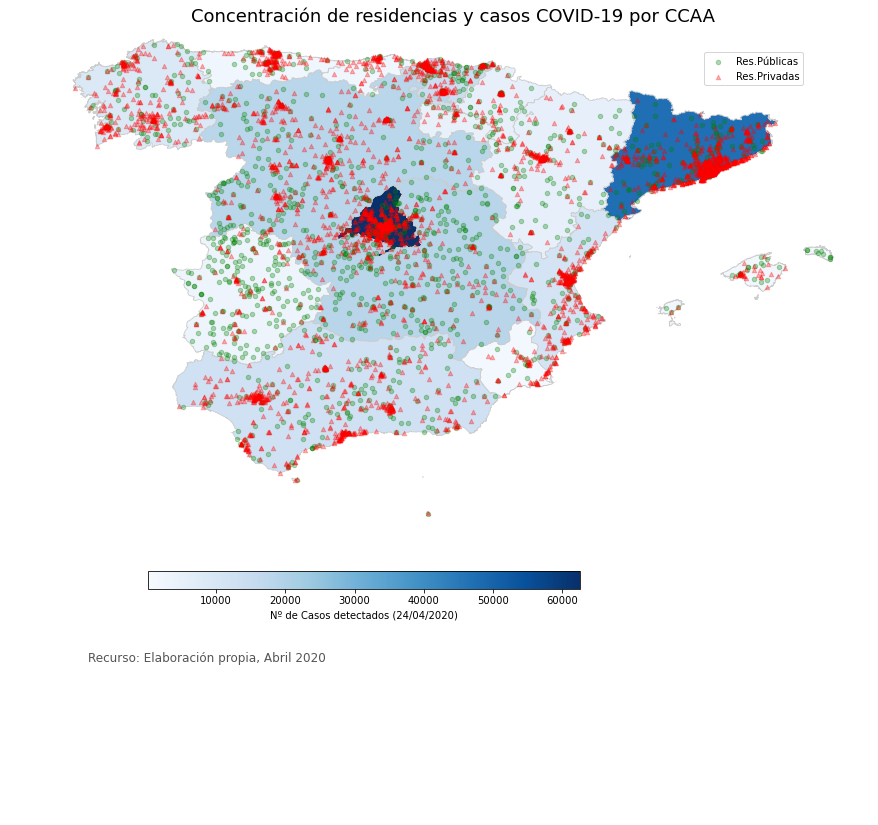

In [860]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Casos'
# set the range for the choropleth
vmin, vmax = np.ceil(covid_ccaa.Casos.max()), np.ceil(covid_ccaa.Casos.min()) #El np.ceil aims to round up
#vmin, vmax = 800000, 1200
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 25))
# eliminar el eje 
ax.axis ('off')
# add a title
ax.set_title('Concentración de residencias y casos COVID-19 por CCAA', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Recurso: Elaboración propia, Abril 2020',xy=(0.1, .21),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#Focus in peninsula
ax.set_ylim([35, 44]);
ax.set_xlim([-10, 5]);
            
# create map
df_covid_ccaa.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');

#Create resident point
df_geo_rs[df_geo_rs['Titularidad'].isin(publicas)].plot(ax = ax, markersize = 20, color = 'g', alpha=0.3, marker="o", label='Res.Públicas')
df_geo_rs[df_geo_rs['Titularidad'].isin(privadas)].plot(ax = ax, markersize = 20, color = 'r', alpha=0.3, marker="^", label='Res.Privadas')
plt.legend(bbox_to_anchor=(.8, .95), loc=2, borderaxespad=0.) #Localización de las etiquetas

#Create a new axes for colorbar
cax = fig.add_axes([0.23, 0.33, 0.4, 0.01])
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', aspect=50, label='Nº de Casos detectados (24/04/2020)')

### Community of Madrid

In [205]:
#We obtain a filter of the municipalities of Catalonia and the Community of Madrid from the NUT Code of each CCAA
#Reference: https://es.wikipedia.org/wiki/NUTS_de_Espa%C3%B1a

#Community of Madrid (CAM): CODNUT1=ES3
cam = map_munic[map_munic.CODNUT1 == 'ES3']
catal = map_munic[map_munic.CODNUT2 == 'ES51']

In [477]:
#We get the points of the residences in the CAM
res_cam = df_geo_rs[df_geo_rs.Provincia == 'Madrid']

In [478]:
len(res_cam)

424

In [479]:
len(res_cam[res_cam['Titularidad'].isin(publicas)])

72

In [510]:
#At this point as we said above, we will have to change the CRS of the Residences to map it next to the df_covid_cam
res_cam = res_cam.to_crs('EPSG:25830')

In [878]:
res_cam.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°W to 0°W and ETRS89 by country
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [879]:
df_covid_cam.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°W to 0°W and ETRS89 by country
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

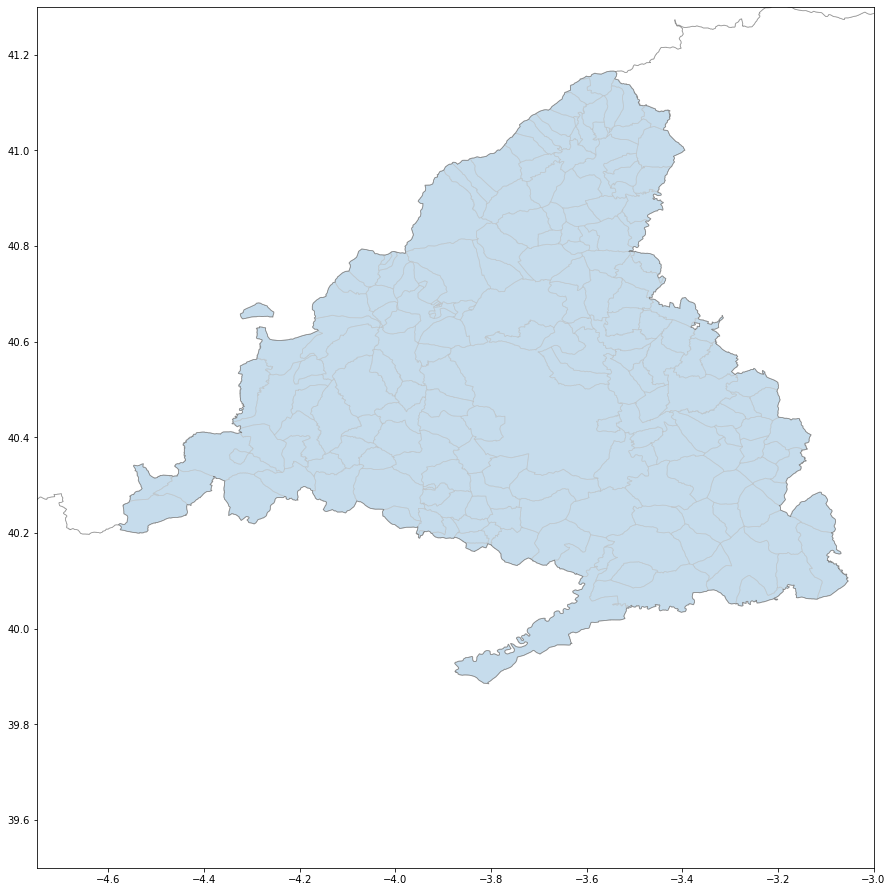

In [222]:
#We will try to analyze and focus on the municipalities. However, not all CCAAs have published COVID-19 cases
#municipio so we'll focus on those available
#In this case we do not have the Municipalities or neighborhoods from within Madrid. So we download the data provided by CAM
fig, ax = plt.subplots(figsize=(15,20))
cam.plot(ax = ax, alpha=.5, linewidth=0.8, edgecolor='0.5');
catal.plot(ax = ax, alpha=.5, linewidth=0.8, edgecolor='0.5');
df_covid_ccaa.plot(ax = ax, color='w' ,alpha=.5, linewidth=.8, edgecolor='0.4');
#Para focalizar en Madrid
ax.set_ylim([39.5, 41.3]);
ax.set_xlim([-4.75, -3]);

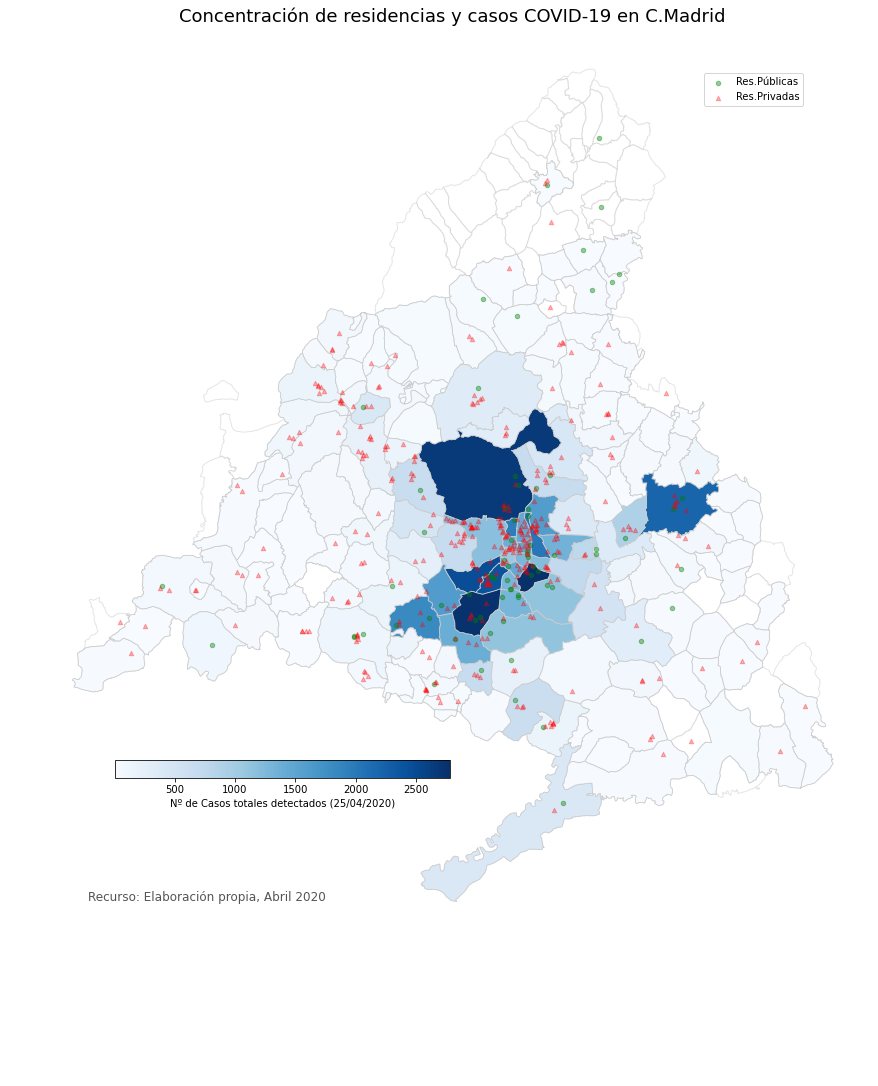

In [880]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Casos'
# set the range for the choropleth
vmin, vmax = np.ceil(df_covid_cam.Casos.min()), np.ceil(df_covid_cam.Casos.max()) 
#vmin, vmax = 800000, 1200
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 25))
# eliminar el eje 
ax.axis ('off')
# add a title
ax.set_title('Concentración de residencias y casos COVID-19 en C.Madrid', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Recurso: Elaboración propia, Abril 2020',xy=(0.1, .18),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# create map
df_covid_cam.plot(ax = ax, color='White',alpha=.5, edgecolor='0.8');
df_covid_cam.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');

#Create resident point
res_cam[res_cam['Titularidad'].isin(publicas)].plot(ax = ax, markersize = 20, color = 'g', alpha=0.4, marker="o", label='Res.Públicas')
res_cam[res_cam['Titularidad'].isin(privadas)].plot(ax = ax, markersize = 20, color = 'r', alpha=0.3, marker="^", label='Res.Privadas')
plt.legend(bbox_to_anchor=(.8, .95), loc=2, borderaxespad=0.) #Localización de las etiquetas

#Create a new axes for colorbar
cax = fig.add_axes([0.20, 0.34, 0.31, 0.01])
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', aspect=50, label='Nº de Casos totales detectados (25/04/2020)')

In [650]:
df_covid_cam[variable].max()

2728.0

In [895]:
casos_mun_CAM = df_covid_cam[['Municipios_CAM', 'Casos']].sort_values('Casos', ascending=False).head(10)

In [897]:
casos_mun_CAM.head()

,Municipios_CAM,Casos
12,Madrid-Puente de Vallecas,2784.0
80,Leganés,2757.0
7,Madrid-Fuencarral-El Pardo,2673.0
9,Madrid-Latina,2480.0
10,Madrid-Carabanchel,2403.0


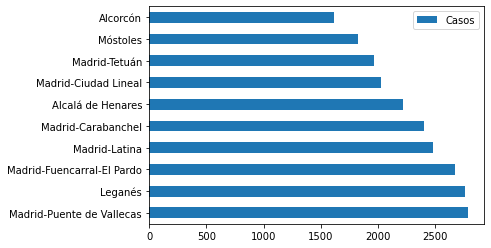

In [899]:
names = casos_mun_CAM['Municipios_CAM'].to_list()
fig, ax = plt.subplots()
casos_mun_CAM.plot(ax = ax, kind='barh');
ax.set_yticklabels(names)
plt.savefig('Figuras/Distribucion_casos_MuniCAM_barh.jpg')
plt.show()

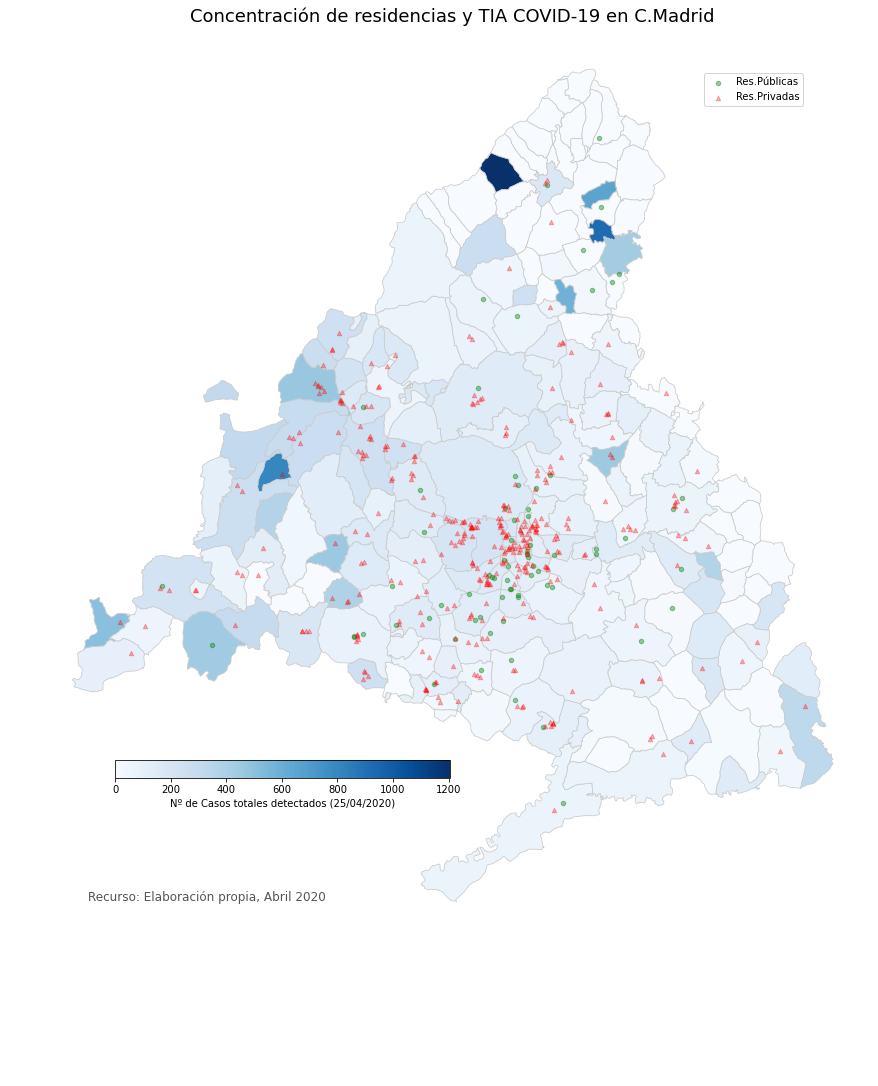

In [883]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'tasa_incidencia_acumulada_ultimos_14dias'
# set the range for the choropleth
vmin, vmax = np.ceil(df_covid_cam[variable].min()), np.ceil(df_covid_cam[variable].max()) #El np.ceil pretende redondear al alza
#vmin, vmax = 800000, 1200
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 25))
# eliminar el eje 
ax.axis ('off')
# add a title
ax.set_title('Concentración de residencias y TIA COVID-19 en C.Madrid', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Recurso: Elaboración propia, Abril 2020',xy=(0.1, .18),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#Focus in peninsula
#ax.set_ylim([35, 44]);
#ax.set_xlim([-10, 5]);
            
# create map
#df_covid_cam.plot(ax = ax, color='White',alpha=.5, edgecolor='0.8');
df_covid_cam.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');

#Create resident point
res_cam[res_cam['Titularidad'].isin(publicas)].plot(ax = ax, markersize = 20, color = 'g', alpha=0.4, marker="o", label='Res.Públicas')
res_cam[res_cam['Titularidad'].isin(privadas)].plot(ax = ax, markersize = 20, color = 'r', alpha=0.3, marker="^", label='Res.Privadas')
plt.legend(bbox_to_anchor=(.8, .95), loc=2, borderaxespad=0.) #Localización de las etiquetas

#Create a new axes for colorbar
cax = fig.add_axes([0.20, 0.34, 0.31, 0.01])
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', aspect=50, label='Nº de Casos totales detectados (25/04/2020)')

In [923]:
df_res_plzs = pd.DataFrame({'Dist_Munc':['Pozuelo-Alarcón','Las-Rozas','Ciempozuelos','San-Sebastian-Reyes','Alcalá-Henares','Colmenar-viejo','Retiro-Moratalaz','Arganzuela','Leganés'],'Plazas':[1287,1134,1101,1084,1025,980,918,899,858]})

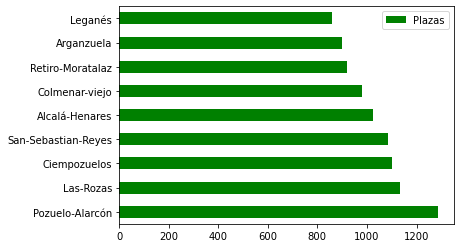

In [925]:
names = df_res_plzs['Dist_Munc'].to_list()
fig, ax = plt.subplots()
df_res_plzs.plot(ax = ax, kind='barh', color='g');
ax.set_yticklabels(names)
#plt.savefig('Figuras/Distribucion_casos_MuniCAM_barh.jpg')
plt.show()

### Cataluña

In [476]:
#We get the points of the residences in Cataluña
res_catal = df_geo_rs[df_geo_rs.Provincia.isin(['Barcelona','Lleida','Girona','Tarragona'])]
res_catal.head()

,Titularidad,Nombre,Dirección,CP,Municipio,Teléfono,Plazas,URL,Latitud,Longitud,Actualizado,Provincia,geometry
502,Privada,Llar d'avis Sant Quirze,Avenida Antoni Gaudí 43,8192.0,Sant Quirze del Vallès,93 721 67 32,86.0,llardavissantquirze.com,41.533532,2.077363,27-05-20 00:14:44,Barcelona,POINT (2.07736 41.53353)
503,Privada,Residencia Maria Rifa,Calle Bruc 46 - ppal. 2ª,8010.0,Barcelona,93 301 51 82,18.0,NaN,41.391891,2.172809,14-03-20 00:14:44,Barcelona,POINT (2.17281 41.39189)
504,Privada,Residencias Urquinaona I y II,Plaza Urquinaona 1 - 2º y 3º,8010.0,Barcelona,93 301 44 99,45.0,www.sta-rita.com,41.388854,2.172342,3-04-20 00:14:44,Barcelona,POINT (2.17234 41.38885)
505,Privada,Residència geriàtrica l'Estell III,Calle Aragó 140 - ppal.,8011.0,Barcelona,93 454 74 81,25.0,www.residenciaestel3.com,41.385350,2.155858,23-04-20 00:14:44,Barcelona,POINT (2.15586 41.38535)
506,Privada,Residencia Les Dàlies,Calle Varsovia 16,8041.0,Barcelona,93 352 86 11,42.0,lavostrallar.com/residencias/residencia-les-da...,41.423928,2.176414,26-04-20 00:14:44,Barcelona,POINT (2.17641 41.42393)


In [709]:
res_catal.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [708]:
df_covid_catal.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

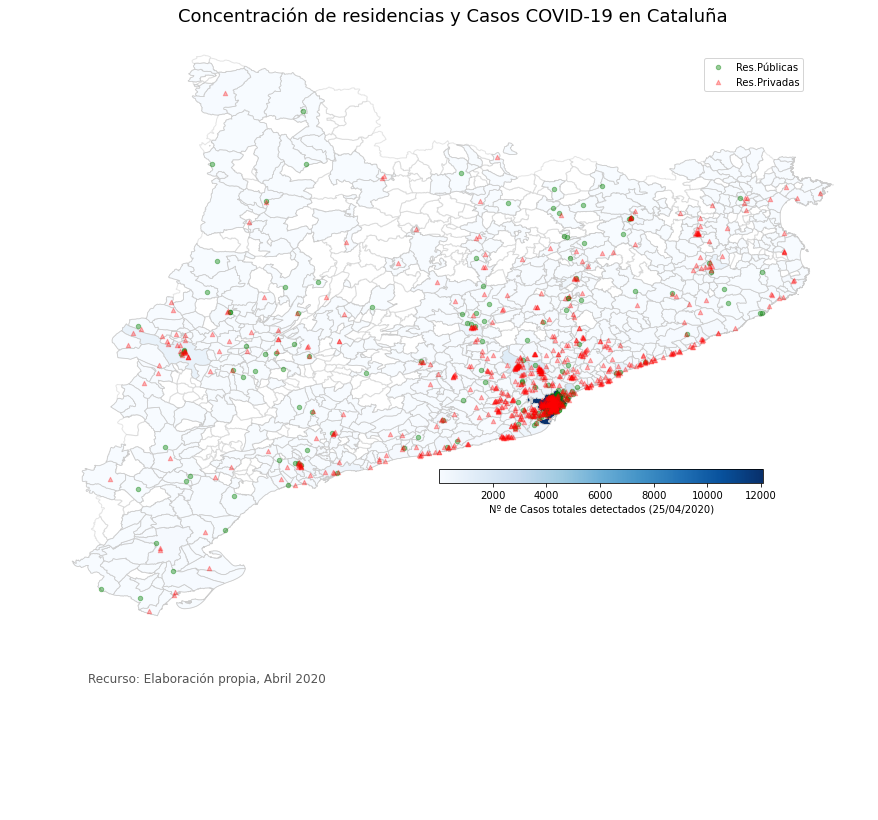

In [963]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Casos'
# set the range for the choropleth
vmin, vmax = df_covid_catal[variable].min().astype(int), df_covid_catal[variable].max().astype(int)
#vmin, vmax = df_covid_catal[variable].min(), df_covid_catal[variable].max()
#vmin, vmax = 0, 17000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 20))
# eliminar el eje 
ax.axis ('off')
# add a title
ax.set_title('Concentración de residencias y Casos COVID-19 en Cataluña', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Recurso: Elaboración propia, Abril 2020',xy=(0.1, .18),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# create map
catal.plot(ax = ax, color='White',alpha=.5, edgecolor='0.8');
df_covid_catal.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');

#Create resident point
res_catal[res_catal['Titularidad'].isin(publicas)].plot(ax = ax, markersize = 20, color = 'g', alpha=0.4, marker="o", label='Res.Públicas')
res_catal[res_catal['Titularidad'].isin(privadas)].plot(ax = ax, markersize = 20, color = 'r', alpha=0.3, marker="^", label='Res.Privadas')
plt.legend(bbox_to_anchor=(.8, .95), loc=2, borderaxespad=0.) #Localización de las etiquetas

#Create a new axes for colorbar
cax = fig.add_axes([0.50, 0.40, 0.30, 0.01])
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', aspect=20, label='Nº de Casos totales detectados (25/04/2020)')

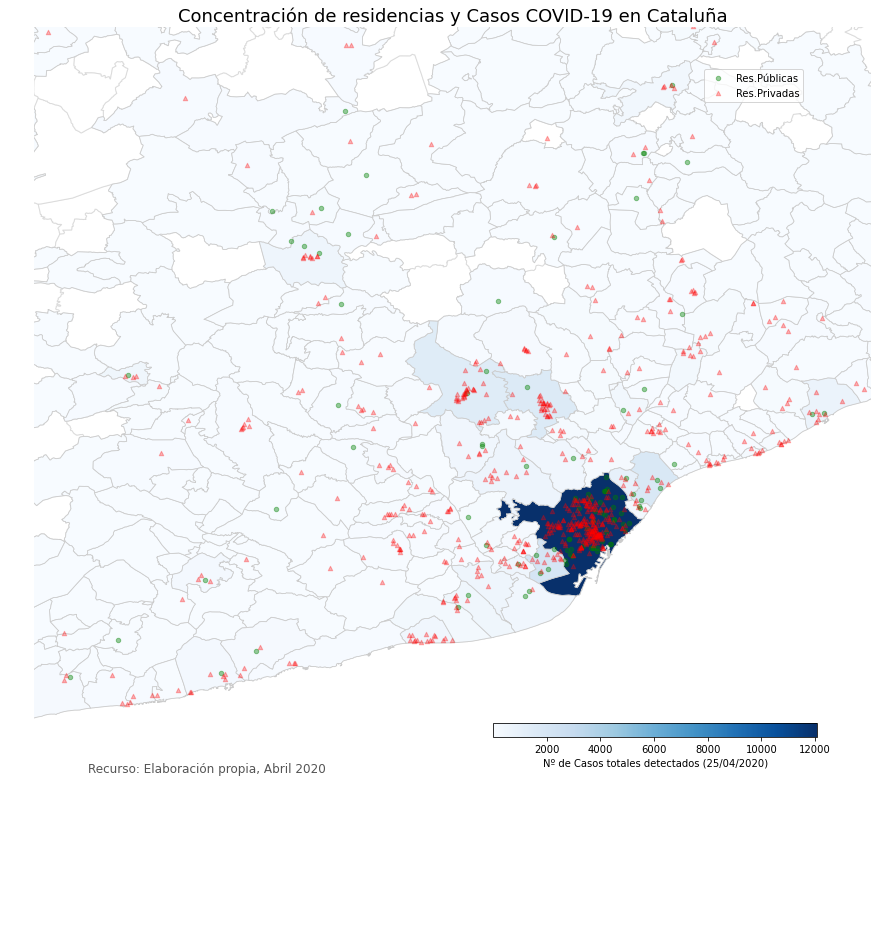

In [964]:
#If we focus on the area of Barcelona to see more details
# set a variable that will call whatever column we want to visualise on the map
variable = 'Casos'
# set the range for the choropleth
vmin, vmax = df_covid_catal[variable].min().astype(int), df_covid_catal[variable].max().astype(int) #El np.ceil pretende redondear al alza
#vmin, vmax = df_covid_catal[variable].min(), df_covid_catal[variable].max()
#vmin, vmax = 0, 17000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 20))
# eliminar el eje 
ax.axis ('off')
# add a title
ax.set_title('Concentración de residencias y Casos COVID-19 en Cataluña', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Recurso: Elaboración propia, Abril 2020',xy=(0.1, .18),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#Focus in peninsula
ax.set_ylim([41, 42]);
ax.set_xlim([1.5, 2.5]);
            
# create map
catal.plot(ax = ax, color='White',alpha=.5, edgecolor='0.8');
df_covid_catal.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');

#Create resident point
res_catal[res_catal['Titularidad'].isin(publicas)].plot(ax = ax, markersize = 20, color = 'g', alpha=0.4, marker="o", label='Res.Públicas')
res_catal[res_catal['Titularidad'].isin(privadas)].plot(ax = ax, markersize = 20, color = 'r', alpha=0.3, marker="^", label='Res.Privadas')
plt.legend(bbox_to_anchor=(.8, .95), loc=2, borderaxespad=0.) #Localización de las etiquetas

#Create a new axes for colorbar
cax = fig.add_axes([0.55, 0.30, 0.30, 0.01])
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', aspect=50, label='Nº de Casos totales detectados (25/04/2020)')

In [968]:
casos_mun_CAT = df_covid_catal[['Municipios_CAT', 'Casos']].sort_values('Casos', ascending=False).head(10)

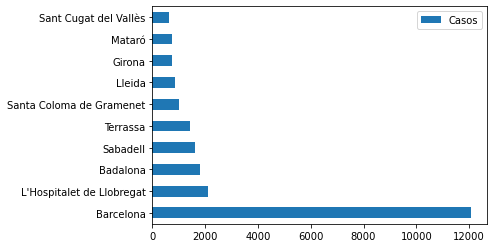

In [971]:
names = casos_mun_CAT['Municipios_CAT'].to_list()
fig, ax = plt.subplots()
casos_mun_CAT.plot(ax = ax, kind='barh');
ax.set_yticklabels(names)
#plt.savefig('Figuras/Distribucion_casos_MuniCAT_barh.jpg')
plt.show()

In [988]:
#Number of residence places per municipality
plazas_mun_CAT = df_rs[(df_rs.CP.astype(str).str.contains('08*')) & (df_rs.Provincia == 'Barcelona')].groupby(['Municipio'])['Plazas'].sum().\
                                                    sort_values(ascending=False).reset_index().head(10)

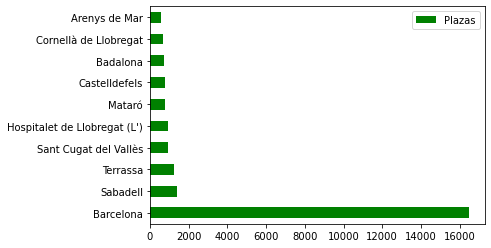

In [991]:
names = plazas_mun_CAT['Municipio'].to_list()
fig, ax = plt.subplots()
plazas_mun_CAT.plot(ax = ax, kind='barh', color='g');
ax.set_yticklabels(names)
#plt.savefig('Figuras/Distribucion_casos_MuniCAT_barh.jpg')
plt.show()

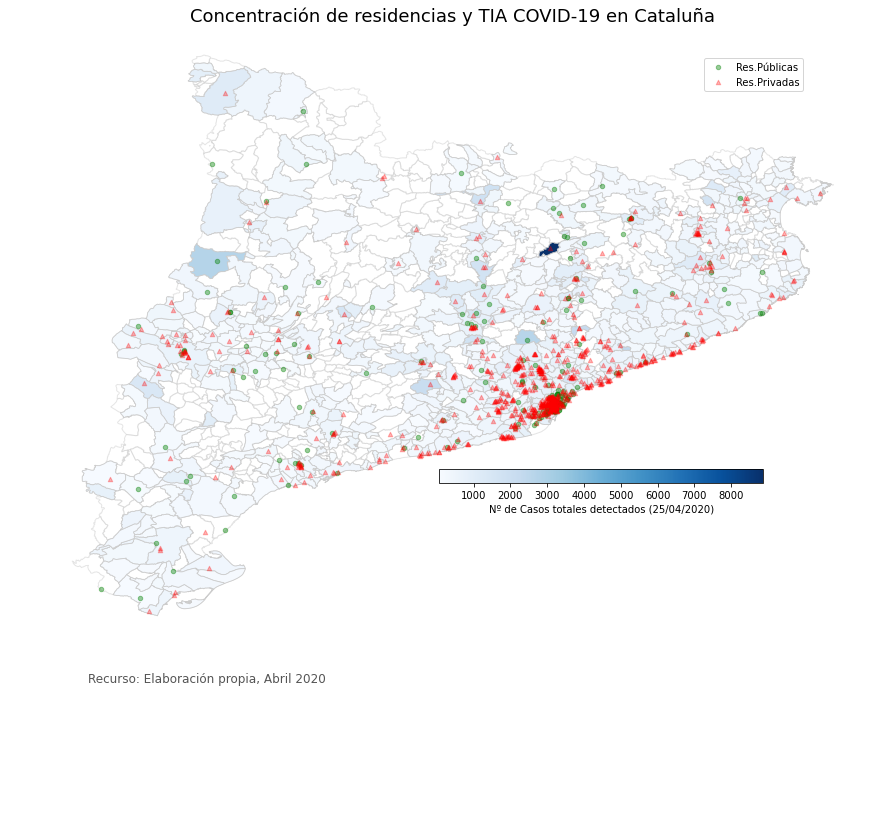

In [966]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Tia'
# set the range for the choropleth
vmin, vmax = df_covid_catal[variable].min().astype(int), df_covid_catal[variable].max().astype(int) #El np.ceil pretende redondear al alza
#vmin, vmax = df_covid_catal[variable].min(), df_covid_catal[variable].max()
#vmin, vmax = 0, 17000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 20))
# eliminar el eje 
ax.axis ('off')
# add a title
ax.set_title('Concentración de residencias y TIA COVID-19 en Cataluña', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Recurso: Elaboración propia, Abril 2020',xy=(0.1, .18),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#Focus in peninsula
#ax.set_ylim([35, 44]);
#ax.set_xlim([-10, 5]);
            
# create map
catal.plot(ax = ax, color='White',alpha=.5, edgecolor='0.8');
df_covid_catal.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');

#Create resident point
res_catal[res_catal['Titularidad'].isin(publicas)].plot(ax = ax, markersize = 20, color = 'g', alpha=0.4, marker="o", label='Res.Públicas')
res_catal[res_catal['Titularidad'].isin(privadas)].plot(ax = ax, markersize = 20, color = 'r', alpha=0.3, marker="^", label='Res.Privadas')
plt.legend(bbox_to_anchor=(.8, .95), loc=2, borderaxespad=0.) #Localización de las etiquetas

#Create a new axes for colorbar
cax = fig.add_axes([0.50, 0.40, 0.30, 0.01])
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', aspect=20, label='Nº de Casos totales detectados (25/04/2020)')